# Alluvial - Testing R Package

Conclusion:  
- Always first create groupby-dataframe

In [2]:
library(tidyverse)
library(alluvial)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
data <- read.csv(file="./data/train.csv", header=TRUE, sep=",")

In [4]:
head(data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [18]:
dataplot = data %>%
  select(Pclass, Survived, Sex, Embarked, Fare, Survived)

In [28]:
dataplot[1:5,1:3]

Pclass,Survived,Sex
3,0,male
1,1,female
3,1,female
1,1,female
3,0,male


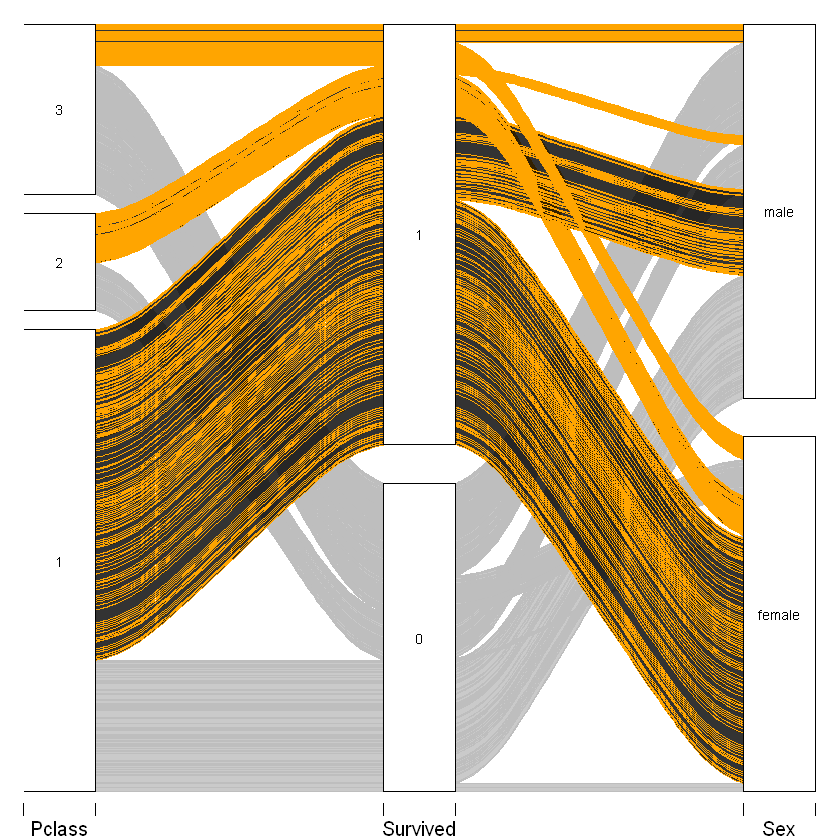

In [29]:
alluvial(dataplot[,1:3], freq=dataplot$Fare,
         col = ifelse(dataplot$Survived == 1, "black", "grey"),
         border = ifelse(dataplot$Survived == 1, "orange", "grey"),
         # hide = data$Freq == 0,
         alpha = 0.8,
         layer = dataplot$Survived == 0,
         
         cex = 0.7
)

In [21]:
head(dataplot)

Pclass,Survived,Sex,Embarked,Fare
3,0,male,S,7.2500
1,1,female,C,71.2833
3,1,female,S,7.9250
1,1,female,S,53.1000
3,0,male,S,8.0500
3,0,male,Q,8.4583


In [24]:
tt1 <- dataplot %>%
    group_by(Embarked, Sex) %>%
    summarise(
        #disp = mean(Fare),
        #hp = mean(Survived)
        count_n = n()
    )

In [25]:
tt1

Embarked,Sex,count_n
,female,2
C,female,73
C,male,95
Q,female,36
Q,male,41
S,female,203
S,male,441


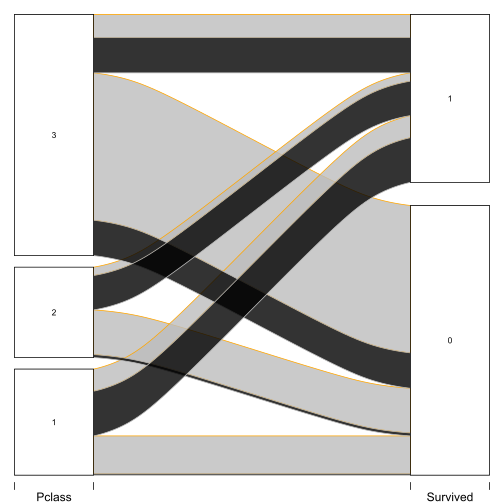

In [34]:
options(jupyter.plot_mimetypes = "image/svg+xml") 

alluvial(tt1[,1:2], freq=tt1$count_n,
         col = ifelse(tt1$Sex == 'female', "black", "grey"),
         border = ifelse(tt1$Sex == 'male', "orange", "grey"),
         # hide = data$Freq == 0,
         alpha = 0.8,
         layer = tt1$Sex == 'male',
         
         cex = 0.7
)

In [30]:
tt1 <- dataplot %>%
    group_by(Pclass, Survived, Sex) %>%
    summarise(
        #disp = mean(Fare),
        #hp = mean(Survived)
        count_n = n()
    )

In [31]:
tt1

Pclass,Survived,Sex,count_n
1,0,female,3
1,0,male,77
1,1,female,91
1,1,male,45
2,0,female,6
2,0,male,91
2,1,female,70
2,1,male,17
3,0,female,72
3,0,male,300


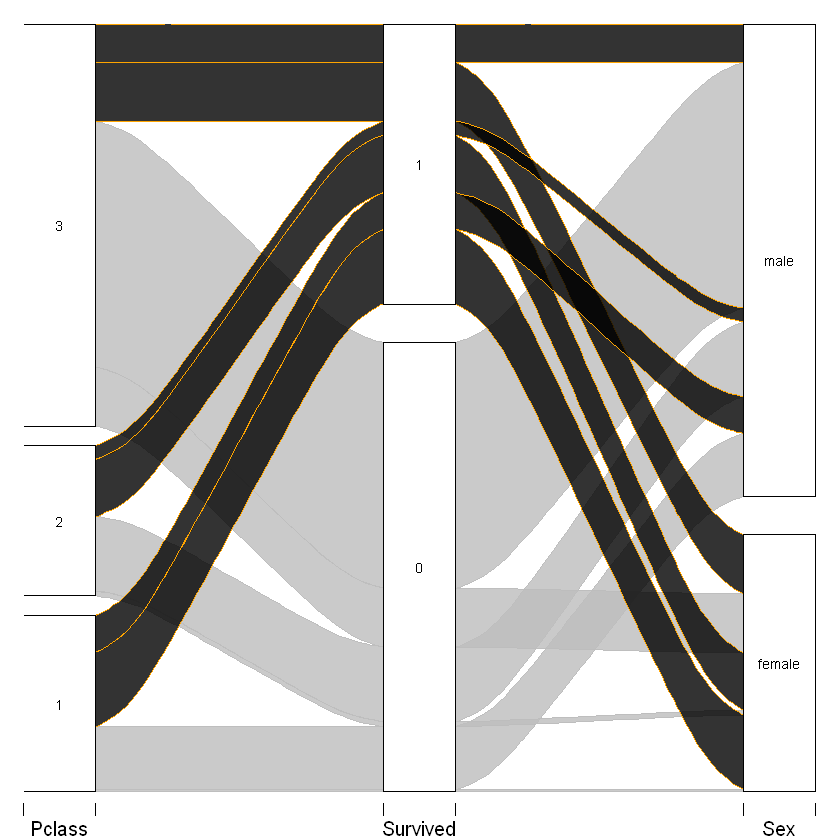

In [33]:
alluvial(tt1[,1:3], freq=tt1$count_n,
         col = ifelse(tt1$Survived == 1, "black", "grey"),
         border = ifelse(tt1$Survived == 1, "orange", "grey"),
         # hide = data$Freq == 0,
         alpha = 0.8,
         layer = tt1$Survived == 0,
         
         cex = 0.7
)